In [1]:
# Import library yang diperlukan
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
from google.colab import files

In [2]:
# Upload file model .h5
print("Silakan upload file model .h5 Anda:")
uploaded = files.upload()

Silakan upload file model .h5 Anda:


Saving model.h5 to model.h5


In [3]:
# Muat model dari file .h5
model = load_model(list(uploaded.keys())[0])
print("Model berhasil dimuat.")

Model berhasil dimuat.


In [4]:
class_names = np.array(["Acne", "Actinic Keratosis", "Benign Tumors", "Bullous", "Candidiasis",
    "Drug Eruption", "Eczema", "Infestations/Bites", "Lichen", "Lupus",
    "Moles", "Psoriasis", "Rosacea", "Seborrheic Keratoses", "Skin Cancer",
    "Sun/Sunlight Damage", "Tinea", "Vascular Tumors", "Vasculitis", "Vitiligo",
    "Warts"])

# Fungsi untuk memproses gambar
def preprocess_image(image_path, target_size=(224, 224)):
    img = Image.open(image_path).convert("RGB")  # Buka gambar dan konversi ke RGB
    img = img.resize(target_size)               # Ubah ukuran gambar
    img_array = np.array(img)                   # Konversi ke array numpy
    img_array = img_array / 255.0               # Normalisasi nilai piksel (0-1)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan dimensi batch
    return img_array

In [5]:
# Upload gambar untuk inferensi
print("Silakan upload gambar untuk inferensi:")
uploaded_image = files.upload()

Silakan upload gambar untuk inferensi:


Saving test_Image.jpg to test_Image.jpg


In [6]:
# Preproses gambar
image_path = list(uploaded_image.keys())[0]
input_data = preprocess_image(image_path)

# Lakukan inferensi
predictions = model.predict(input_data)
predicted_class = np.argmax(predictions[0])  # Ambil kelas dengan probabilitas tertinggi

# Tampilkan hasil prediksi
print(f"Hasil prediksi: {class_names[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
Hasil prediksi: Skin Cancer


**Inferensi API**

In [7]:
import requests

# URL API
url = "https://api-model-v1.onrender.com/predict"

# Path ke file gambar yang ingin diprediksi
image_path = "test_Image.jpg"

# Buka file gambar dan kirimkan sebagai multipart/form-data
with open(image_path, "rb") as image_file:
    files = {"image": image_file}
    response = requests.post(url, files=files)

# Tampilkan hasil prediksi
if response.status_code == 200:
    print("Hasil prediksi:", response.json())
else:
    print("Error:", response.status_code, response.text)

Hasil prediksi: {'prediction': 'Skin Cancer'}


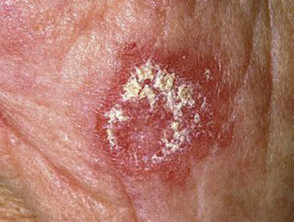

In [10]:
from IPython.display import display

# Tampilkan gambar
image_path = "test_Image.jpg"
img = Image.open(image_path)
display(img)